# PCA Demo

This demo shows various applications of PCA using Scikit-Learn's built-in PCA function.
Demo by Harris Chan (hchan [at] cs [dot] toronto [dot] edu)

In [1]:
# Import some libraries
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10,10) # Set the size of the plots

## PCA Example on Synthetic 2D Random data
In this example, we'll create a bunch of 2D data which follows a tilted and elongated Gaussian distribution. 

First, let's generate some data:

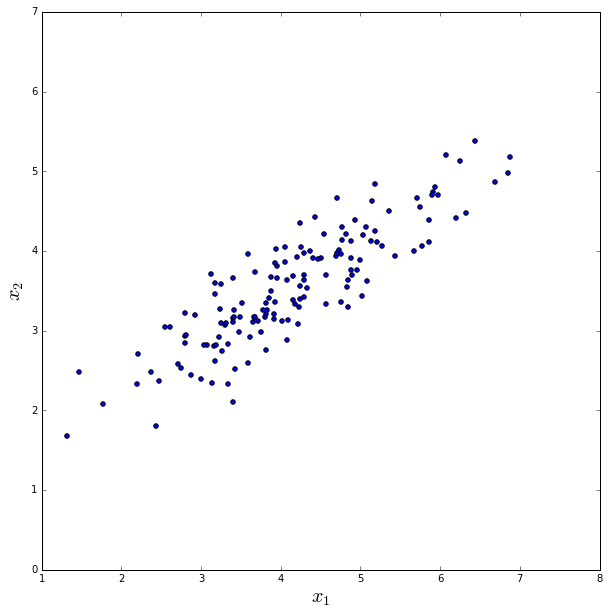

In [2]:
# Generate some random 2D data
np.random.seed(3)

sample_1 = np.random.normal(scale=0.5, size=(150)) + 2
sample_2 = np.random.normal(scale=1.0, size=(150)) + 3

# Create our (x,y) data points from those two samples. This will create a tilted + elongated Gaussian distribution
x1 = 0.5*sample_1 + 1*sample_2
x2 = sample_1 + 0.5*sample_2
data = np.array(zip(x1, x2))

# Visualize the data
plt.scatter(x1, x2)
plt.axes().set_aspect('equal', 'datalim')
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$x_2$", fontsize=20)

We should first subtract the samples' mean to center the data:

In [3]:
# Calculate the mean and subtract it 
data_mean = np.mean(data, axis=0)
print data_mean
data_centered = data - data_mean

[ 4.14394857  3.54846096]


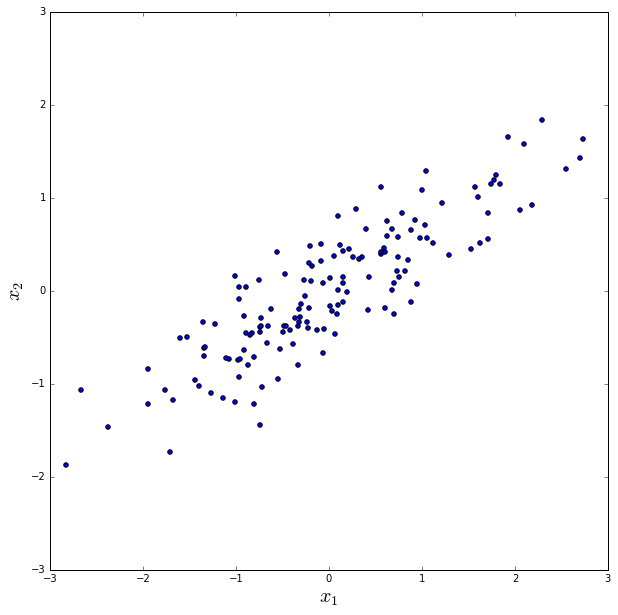

In [4]:
# Visualize the centered data
x1 = data_centered[:,0]
x2 = data_centered[:,1]
plt.scatter(x1, x2)
plt.axes().set_aspect('equal', 'datalim')
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$x_2$", fontsize=20)

We'll initialize a PCA object with 2 components, then fit to the given data

In [5]:
# Initiate PCA object 
pca = PCA(n_components=2)
pca.fit(data_centered)
pca_score = pca.explained_variance_ratio_ # The proportion of variance explained by each unit vector direction
V = pca.components_ # The unit vectors found by PCA

The two principal components are:

In [6]:
V

array([[-0.84435438, -0.53578511],
       [ 0.53578511, -0.84435438]])

Let's see the prinicipal components plotted against the original data:

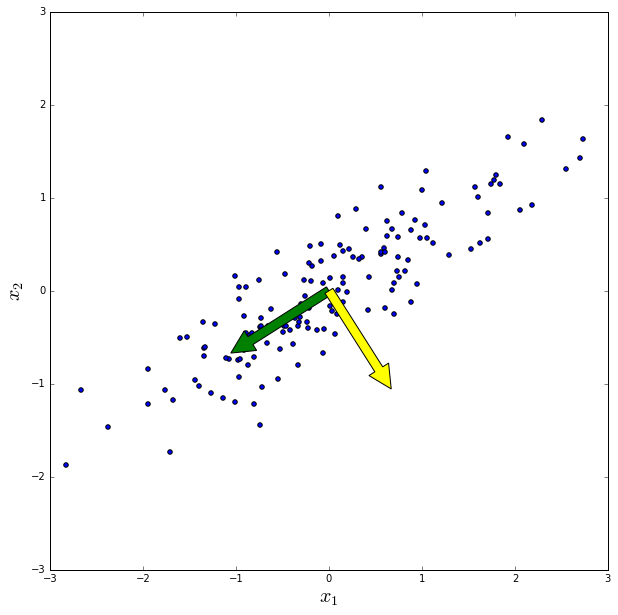

In [7]:
# Visualize the data 
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(x1, x2)
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$x_2$", fontsize=20)
ax = plt.axes()
ax.arrow(0, 0, V[0,0], V[0,1], head_width=0.25, head_length=0.25, fc='green', ec='black', width=0.1) # First component in green
ax.arrow(0, 0, V[1,0], V[1,1], head_width=0.25, head_length=0.25, fc='yellow', ec='black', width=0.1) # Second component in yellow

We can also see the percentage of the total variance explained by each of the components:

In [8]:
pca_score

array([ 0.94619838,  0.05380162])

As we can see from above, the first component explains most of the variation. 

Now, we can also try to project the data into each of the principle components and re-plot projected data:

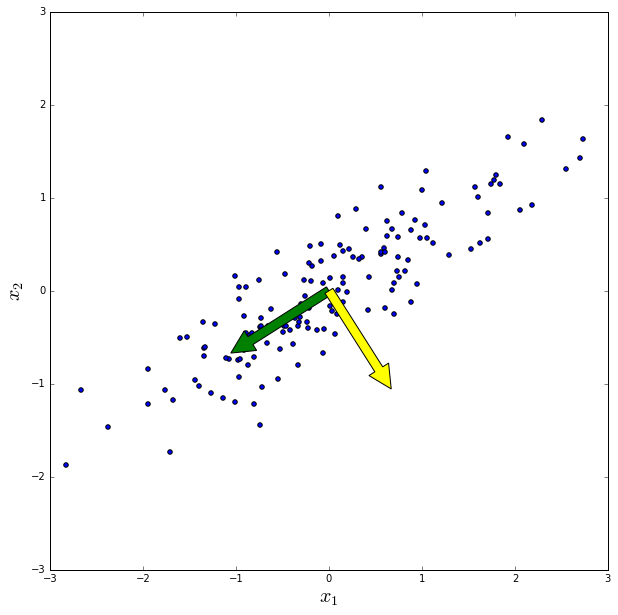

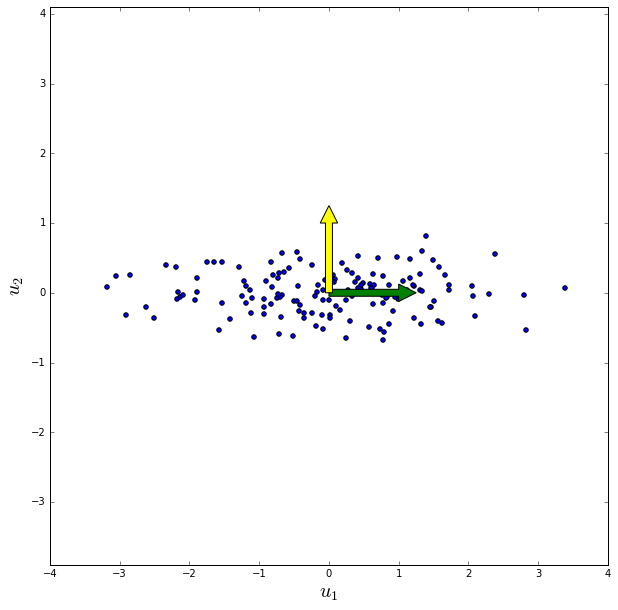

In [9]:
# Visualize the data 
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(x1, x2)
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$x_2$", fontsize=20)
ax = plt.axes()
ax.arrow(0, 0, V[0,0], V[0,1], head_width=0.25, head_length=0.25, fc='green', ec='black', width=0.1) # First component in green
ax.arrow(0, 0, V[1,0], V[1,1], head_width=0.25, head_length=0.25, fc='yellow', ec='black', width=0.1) # Second component in yellow

# Visualize the transformed data
plt.figure()
data_trans = pca.transform(data_centered)
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(data_trans[:,0],data_trans[:,1])
plt.xlabel("$u_1$", fontsize=20)
plt.ylabel("$u_2$", fontsize=20)
ax = plt.axes()
ax.arrow(0, 0, 1, 0, head_width=0.25, head_length=0.25, fc='green', ec='black', width=0.1) # First component in green
ax.arrow(0, 0, 0, 1, head_width=0.25, head_length=0.25, fc='yellow', ec='black', width=0.1) # Second component in yellow

So essentially this PCA transformation has rotated the data so that the data is aligned with its principal components!

Let's see what happens if we only use 1 component and projected the data:

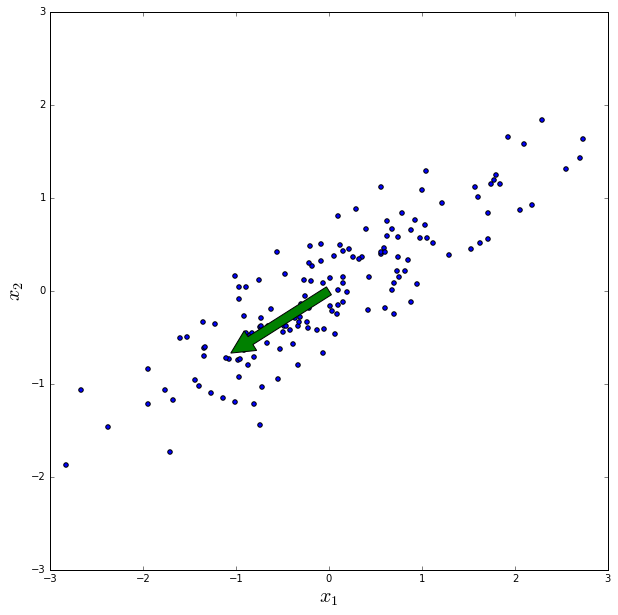

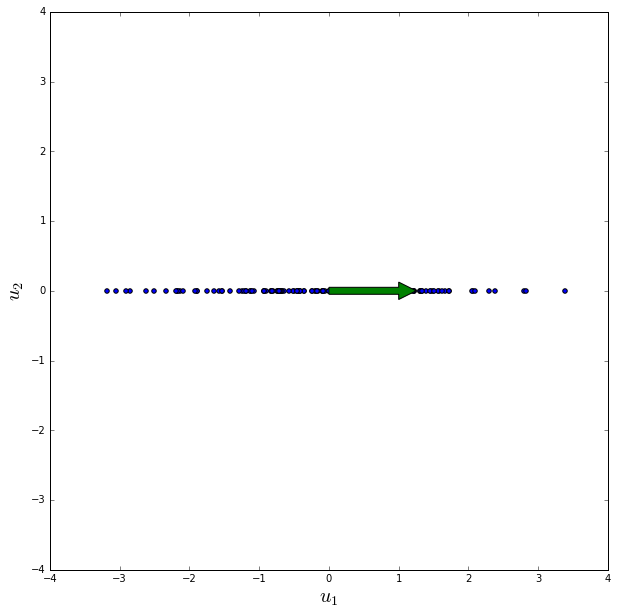

In [10]:
pca = PCA(n_components=1)
pca.fit(data_centered)
pca_score = pca.explained_variance_ratio_ # The proportion of variance explained by each unit vector direction
V = pca.components_ # The unit vectors found by PCA

# Visualize the data 
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(x1, x2)
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$x_2$", fontsize=20)
ax = plt.axes()
ax.arrow(0, 0, V[0,0], V[0,1], head_width=0.25, head_length=0.25, fc='green', ec='black', width=0.1) # First component in green

# Visualized the projected data
plt.figure()
data_trans = pca.transform(data_centered)
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(data_trans[:,0], [0]*len(data))
plt.xlabel("$u_1$", fontsize=20)
plt.ylabel("$u_2$", fontsize=20)
ax = plt.axes()
ax.arrow(0, 0, 1, 0, head_width=0.25, head_length=0.25, fc='green', ec='black', width=0.1) # First component in green

If we try to reconstruct the data, we'll get data points lying only along the line of the first principle component:

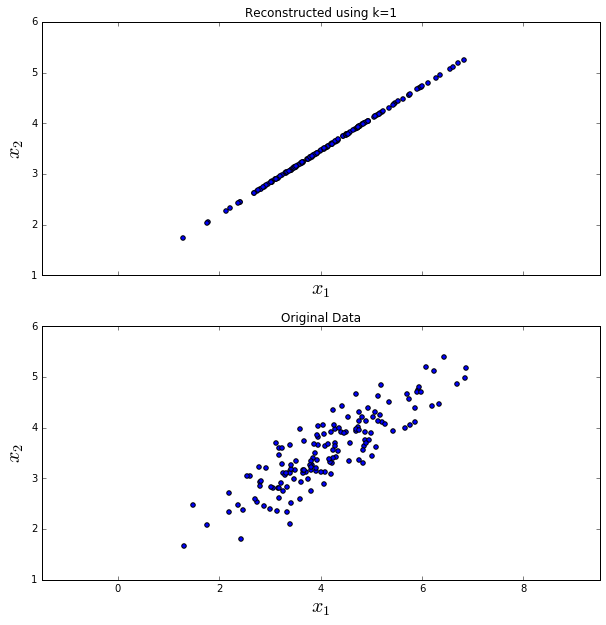

In [11]:
data_recon = pca.inverse_transform(data_trans) + data_mean
f, ax = plt.subplots(2,1, sharex=True, sharey=True)

ax[0].scatter(data_recon[:,0], data_recon[:,1])
ax[0].set_xlabel("$x_1$", fontsize=20)
ax[0].set_ylabel("$x_2$", fontsize=20)
ax[0].set_aspect('equal', 'datalim')
ax[0].set_title("Reconstructed using k=1")

ax[1].scatter(data[:,0], data[:,1])
ax[1].set_xlabel("$x_1$", fontsize=20)
ax[1].set_ylabel("$x_2$", fontsize=20)
ax[1].set_aspect('equal', 'datalim')
ax[1].set_title("Original Data")


We've lost the variation in the data along the second component.

## PCA on Images: MNIST Digits

Let's try to download MNIST and run PCA on a subset of the data and see what kind of unit vectors it has learned

In [12]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home="./mnist_data")

In [13]:
mnist.data.shape

(70000, 784)

In [14]:
mnist.target.shape

(70000,)

In [15]:
np.unique(mnist.target)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

Let's find out the indices for the data points that correspond to "3":

In [16]:
np.where(mnist.target == 3)

(array([18623, 18624, 18625, ..., 64154, 64155, 64156]),)

In [17]:
data_mnist_2 = mnist.data[np.where(mnist.target == 3)]

We can visualize the first nine images for "3" digits:

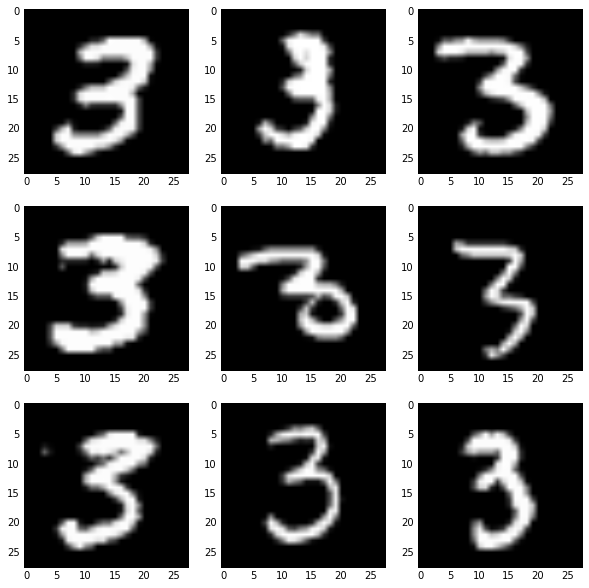

In [18]:
# Look at some data
f, ax = plt.subplots(3,3)
plt.gray()
for r in range(3):
    for c in range(3):
        ax[r][c].imshow(data_mnist_2[r*3+c].reshape([28,28]))

Let's try to run PCA on the images of 3's with k=10 components:

In [19]:
pca = PCA(n_components=10)
mean_image = np.mean(data_mnist_2, axis=0)
data_centered = data_mnist_2 - mean_image
pca.fit(data_centered) # All are two's
pca_score = pca.explained_variance_ratio_ # The proportion of variance explained by each unit vector direction
V = pca.components_ # The unit vectors found by PCA

In [20]:
V

array([[ -1.08544631e-18,  -1.92567231e-18,  -8.96119384e-20, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [ -1.10471547e-17,   2.84013364e-17,   3.51047369e-19, ...,
         -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [ -1.35657595e-17,  -7.43885642e-17,  -9.31253268e-19, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [ -4.35024854e-17,  -4.81231354e-17,  -6.73426076e-17, ...,
         -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [ -7.51929943e-17,  -9.52985628e-18,   1.81279045e-18, ...,
         -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [ -2.54934956e-17,  -1.10917918e-17,   2.07919760e-16, ...,
         -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00]])

We'll plot the mean and the components as images

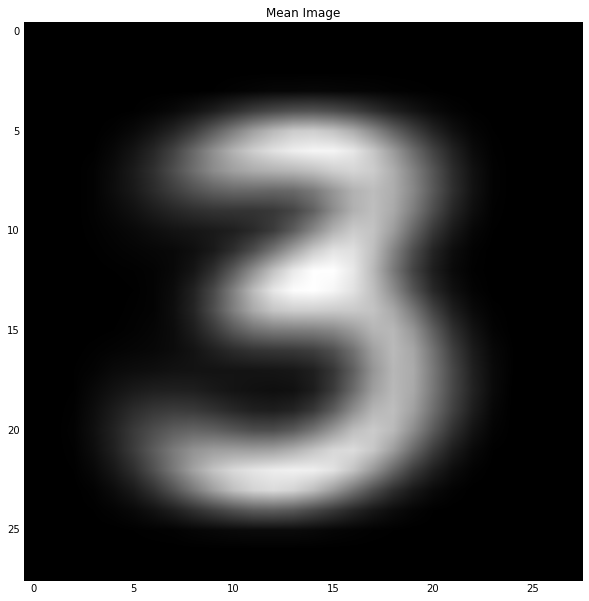

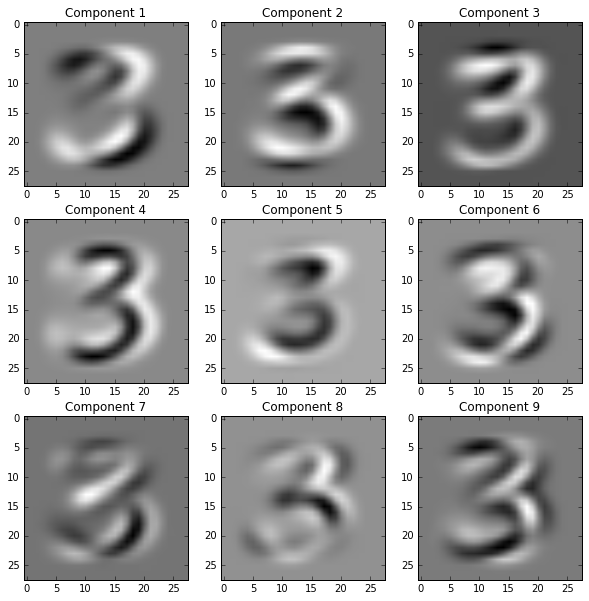

In [21]:
# Plot the mean
plt.gray()
plt.imshow(mean_image.reshape(28, 28))
plt.title("Mean Image")

# Plot the first 9 components
plt.figure()
f, ax = plt.subplots(3,3)
for r in range(3):
    for c in range(3):
        ax[r][c].imshow(V[3*r+c].reshape([28,28]))
        ax[r][c].set_title("Component {}".format(3*r+c+1))

The first component allows the 3 to have some variation with a slight tilts.

Let's try to reconstruct the image from the 10-dimensional projection

In [22]:
data_recon = pca.inverse_transform(pca.transform(data_centered)) + mean_image

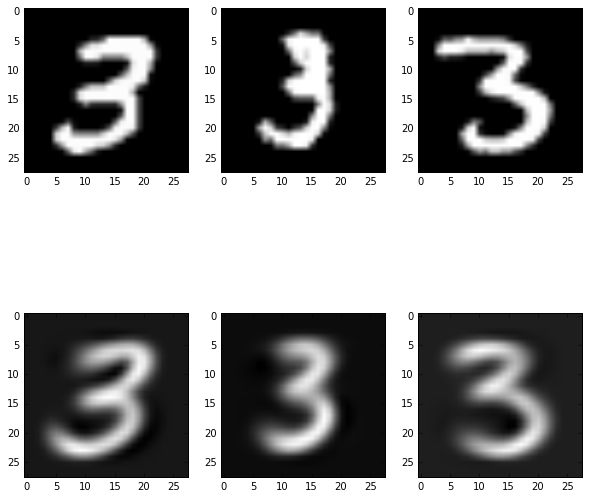

In [23]:
# Compare the original and reconstructed
f, ax = plt.subplots(2,3)
plt.gray()
for c in range(3):
    ax[0][c].imshow(data_mnist_2[c].reshape([28,28]))
for c in range(3):
    ax[1][c].imshow(data_recon[c].reshape([28,28]))

Although the reconstructed images are somewhat blurry, we still get the general shape of the 3's. Now let's try to vary the number of components (k) and see how the reconstructions improve:

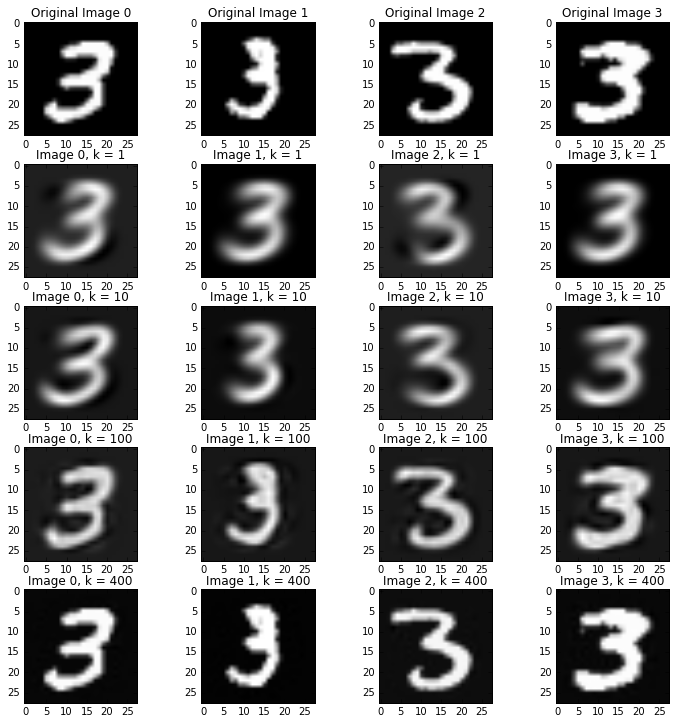

In [24]:
def run_pca(num_components, data):
    pca = PCA(n_components=num_components)
    data_mean = np.mean(data, axis=0)
    data_centered = data - data_mean
    pca.fit(data_centered) # All are two's
    pca_score = pca.explained_variance_ratio_ # The proportion of variance explained by each unit vector direction
    V = pca.components_ # The unit vectors found by PCA
    data_recon = pca.inverse_transform(pca.transform(data_centered)) + data_mean
    
    return data_recon, V, pca_score

# Run PCA for various number of k 
k_list = [1, 10, 100,400]
data_recon_list = []
for k in k_list:
    data_recon, V, pca_score = run_pca(k, data_mnist_2)
    data_recon_list.append(data_recon)

# Compare the original and reconstructed
f, ax = plt.subplots(1 + len(k_list),4)
plt.gray()
f.tight_layout()
for c in range(4):
    ax[0][c].imshow(data_mnist_2[c].reshape([28,28]))
    ax[0][c].set_title("Original Image {}".format(c))
for r in range(1, len(k_list)+1):
    for c in range(4):
        ax[r][c].imshow(data_recon_list[r - 1][c].reshape([28,28]))
        ax[r][c].set_title("Image {}, k = {}".format(c,k_list[r-1]))

At k = 100, we're getting a pretty good result with using only slightly more than 1/8 of information! (Total dim = 784). 

Let's plot the total percentage of variance explained cumulatively by the components as we increase the number of components:

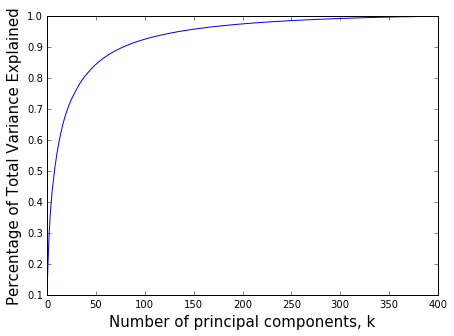

In [25]:
pca_score_cumulative = np.cumsum(pca_score)
plt.figure(figsize=(7,5))
plt.plot(range(len(pca_score_cumulative)), pca_score_cumulative)
plt.ylabel("Percentage of Total Variance Explained", fontsize=15)
plt.xlabel("Number of principal components, k", fontsize=15)

At around k=80, we're explaining already 90% of the variance, which shows us why the reconstructions at k=80 looks fairly good.

## PCA on Images: Olivetti Faces

http://scikit-learn.org/stable/datasets/olivetti_faces.html

"This dataset contains a set of face images taken between April 1992 and April 1994 at AT&T Laboratories Cambridge. 
There are ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement)."


In [26]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces(data_home="./face_data")

In [27]:
faces.data.shape

(400, 4096)

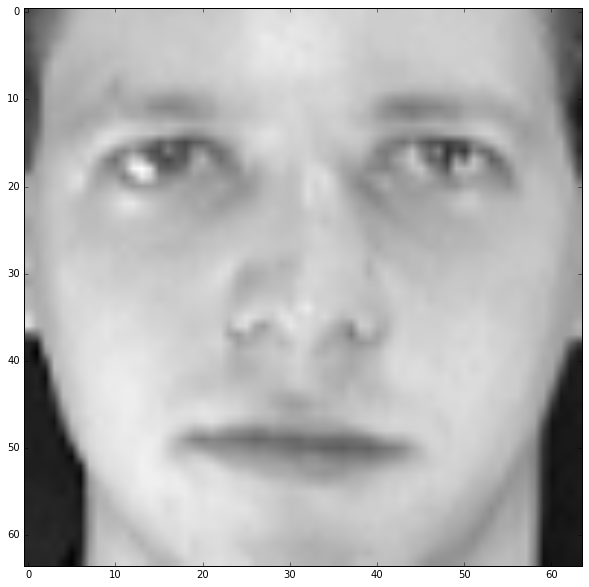

In [28]:
plt.imshow(faces.data[0].reshape(64,64))

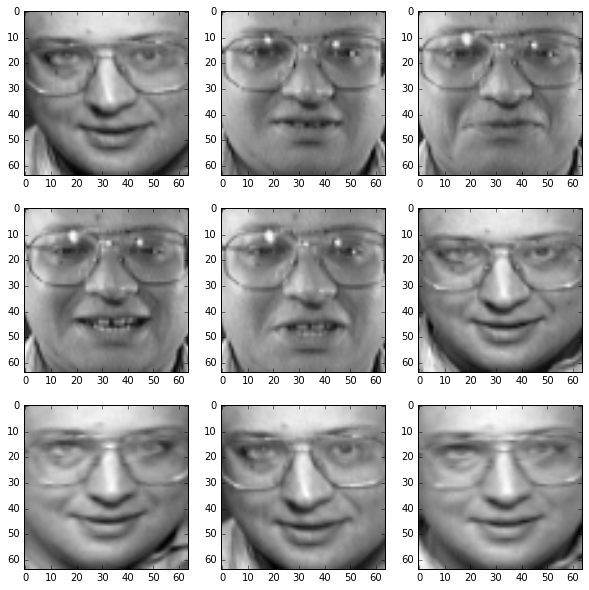

In [29]:
offset = 300
f, ax = plt.subplots(3,3)
plt.gray()
for r in range(3):
    for c in range(3):
        ax[r][c].imshow(faces.data[3*r+c+offset].reshape([64,64]))

In [30]:
data_recon, V, pca_score = run_pca(100, faces.data)

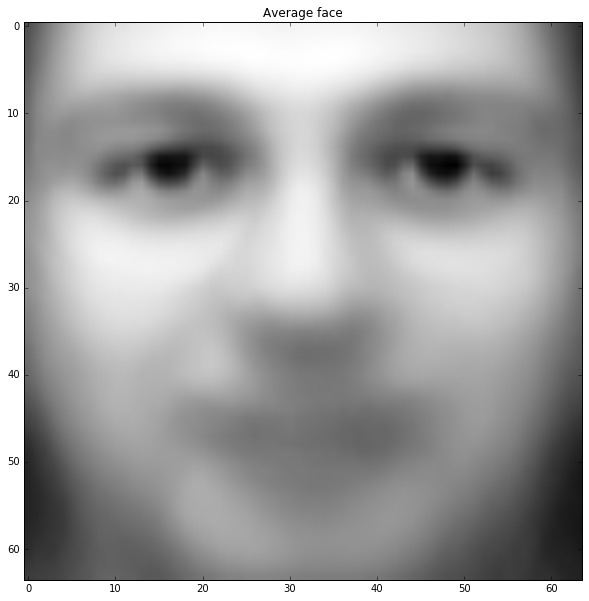

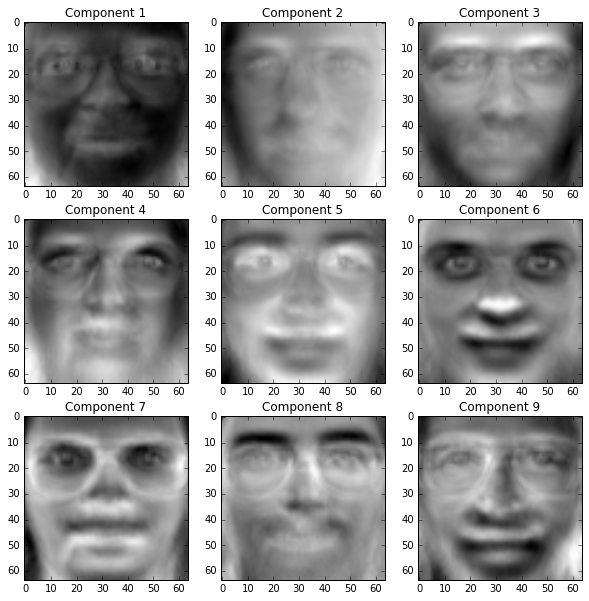

In [31]:
mean_image = np.mean(faces.data, axis=0)
plt.imshow(mean_image.reshape(64,64))
plt.title("Average face")

plt.figure()
f, ax = plt.subplots(3,3)
plt.gray()
for r in range(3):
    for c in range(3):
        ax[r][c].imshow(V[3*r+c].reshape([64,64]))
        ax[r][c].set_title("Component {}".format(3*r+c+1))

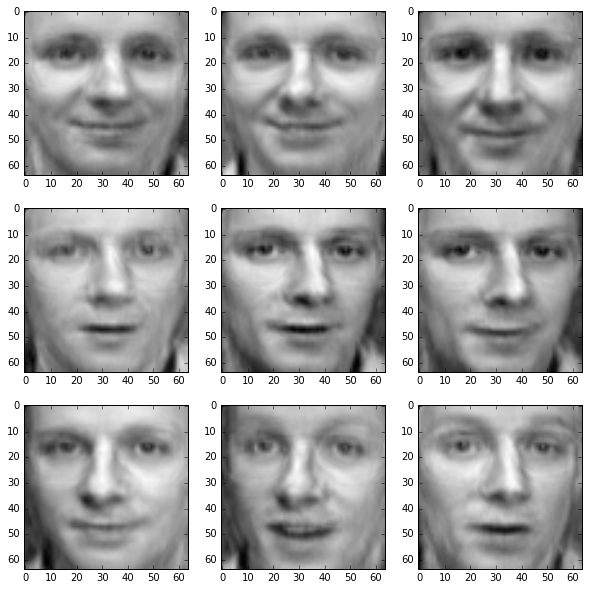

In [32]:
# Look at some data
offset = 200
f, ax = plt.subplots(3,3)
plt.gray()
for r in range(3):
    for c in range(3):
        ax[r][c].imshow(data_recon[r*3 + c + offset].reshape([64,64]))

In [33]:
# Run PCA for various number of k 
k_list = [1, 10, 75, 200]
data_recon_list = []
for k in k_list:
    data_recon, V, pca_score = run_pca(k, faces.data)
    data_recon_list.append(data_recon)

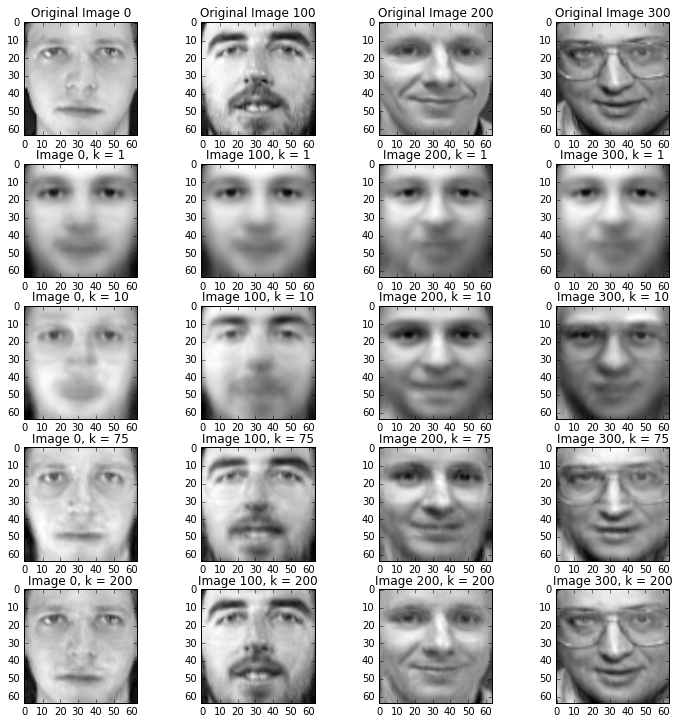

In [34]:
# Compare the original and reconstructed
offset = 100 # Change this to view different parts of the dataset
f, ax = plt.subplots(1 + len(k_list),4,figsize=(10,10))
plt.gray()
f.tight_layout()
for c in range(4):
    ax[0][c].imshow(faces.data[c*offset].reshape([64,64]))
    ax[0][c].set_title("Original Image {}".format(c*offset))
for r in range(1, len(k_list)+1):
    for c in range(4):
        ax[r][c].imshow(data_recon_list[r - 1][c*offset].reshape([64,64]))
        ax[r][c].set_title("Image {}, k = {}".format(c*offset,k_list[r-1]))

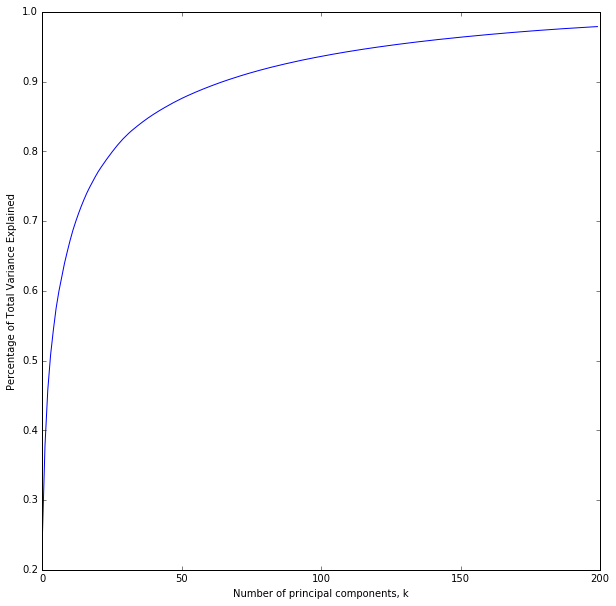

In [35]:
# Total Variance Curve
pca_score_cumulative = np.cumsum(pca_score)
plt.plot(range(len(pca_score_cumulative)), pca_score_cumulative)
plt.ylabel("Percentage of Total Variance Explained")
plt.xlabel("Number of principal components, k")

## Visualization of Iris datasets

This dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set) consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) with 4 features: Sepal Length, Sepal Width, Petal Length and Petal Width, measured in centimeters.

In [36]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

print "Data shape: ", (X.shape)
print "Print target shape: ",(y.shape)
print X[0:10]

Data shape:  (150, 4)
Print target shape:  (150,)
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]


In [37]:
# Standardize features by removing the mean and scaling the variance
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print X_std[0:10]

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]
 [-0.53717756  1.95766909 -1.17067529 -1.05003079]
 [-1.50652052  0.80065426 -1.3412724  -1.18150376]
 [-1.02184904  0.80065426 -1.2844067  -1.31297673]
 [-1.74885626 -0.35636057 -1.3412724  -1.31297673]
 [-1.14301691  0.10644536 -1.2844067  -1.4444497 ]]


Let's visualize the dataset in 2D where the axes are the sepal length and sepal width:

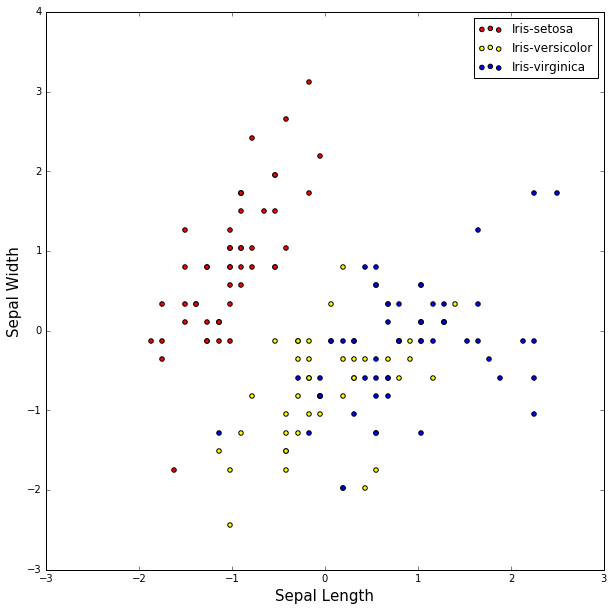

In [38]:
names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colours = ['red', 'yellow', 'blue']
for i in range(len(names)):
    plt.scatter(X_std[y==i, 0], X_std[y==i, 1],
                label=names[i],
                c=colours[i])
plt.xlabel('Sepal Length', fontsize=15)
plt.ylabel('Sepal Width', fontsize=15)
plt.legend(loc='upper right')

Let's run PCA with 2 components and plot the transformed data:

In [39]:
pca = PCA(n_components=2)
X_trans = pca.fit_transform(X_std)

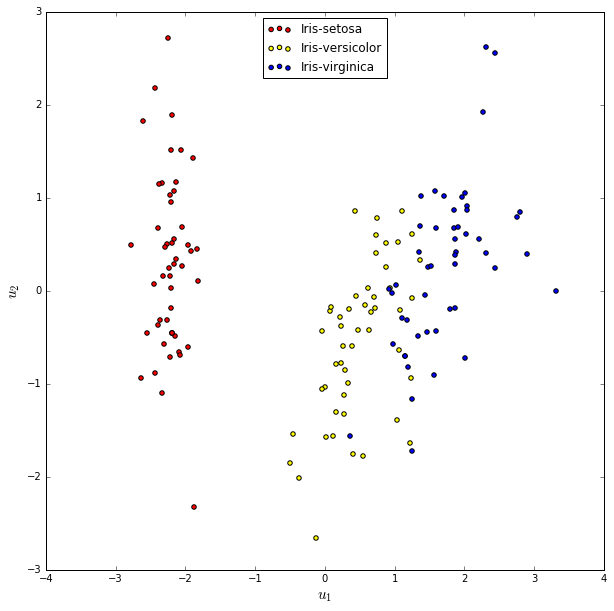

In [40]:
names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colours = ['red', 'yellow', 'blue']
for i in range(len(names)):
    plt.scatter(X_trans[y==i, 0], X_trans[y==i, 1],
                label=names[i],
                c=colours[i])
plt.xlabel('$u_1$', fontsize=15)
plt.ylabel('$u_2$', fontsize=15)
plt.legend(loc='upper center')

The Versicolor and Virginica is slightly better separated with 2 principal components